In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data_original = pd.read_csv('Mall_Customers.csv')
print(data_original.head())
data_original.drop('CustomerID', axis=1, inplace=True)
print("data.isnull(): \n", data_original.isnull().sum())
print("data.isna(): \n",data_original.isna().sum())
print("\ntypy danych: \n", data_original.dtypes)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
data.isnull(): 
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
data.isna(): 
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

typy danych: 
 Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
categorical_columns = data_original.select_dtypes(include=['object']).columns.tolist()
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_data = one_hot_encoder.fit_transform(data_original[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data_original.drop(categorical_columns, axis=1), encoded_df], axis=1)
print(data.head())


   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  Gender_Male
0   19                  15                      39            0.0          1.0
1   21                  15                      81            0.0          1.0
2   20                  16                       6            1.0          0.0
3   23                  16                      77            1.0          0.0
4   31                  17                      40            1.0          0.0


In [ ]:
x = data.iloc[:,[0,2]]
print(x)

     Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]


In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

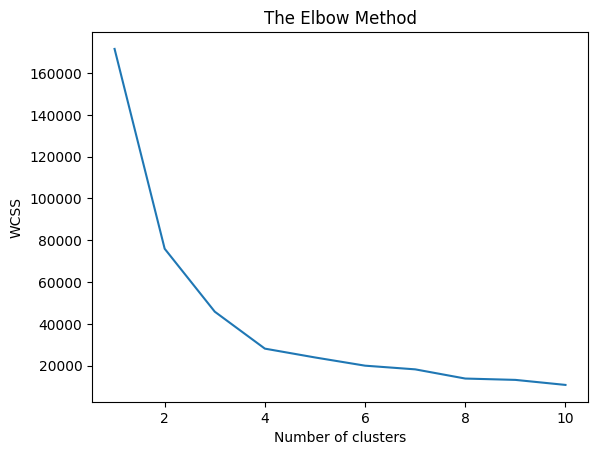

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

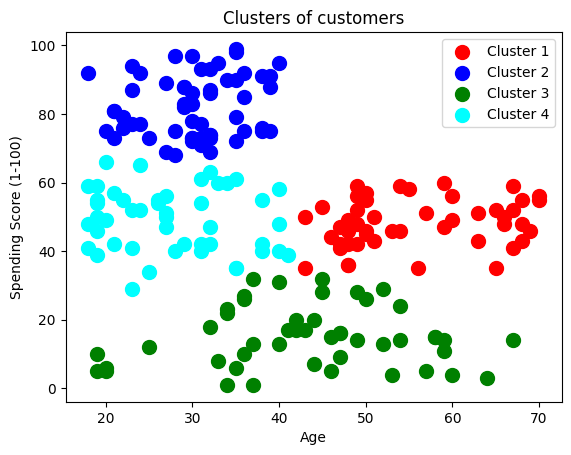

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
#jak działa adresowanie do rysowania wykresów?
#x[y_kmeans == 0, 0], pierwsza wspolrzedna zwraca nam maske logiczna z y_kmeans, gdzie są ==0
#a to z kolei oznacza, ze dostaniemy tylko te wiersze, ktore zostaly zaklasyfikowane do klastra 0
#x.columns[0], zwraca nam wartosci danej cechy, czyli tutaj age
#dla argumentu dla y robimy to samo, ale dla argumentu spending score
plt.scatter(x.loc[y_kmeans == 0, x.columns[0]], x.loc[y_kmeans == 0, x.columns[1]], s=100, c='red', label='Cluster 1')
plt.scatter(x.loc[y_kmeans == 1, x.columns[0]], x.loc[y_kmeans == 1, x.columns[1]], s=100, c='blue', label='Cluster 2')
plt.scatter(x.loc[y_kmeans == 2, x.columns[0]], x.loc[y_kmeans == 2, x.columns[1]], s=100, c='green', label='Cluster 3')
plt.scatter(x.loc[y_kmeans == 3, x.columns[0]], x.loc[y_kmeans == 3, x.columns[1]], s=100, c='cyan', label='Cluster 4')

plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.title('Clusters of customers')
plt.legend()
plt.show()